In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
raw_data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')


In [3]:
raw_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df = raw_data.loc[raw_data['Sport']=='Gymnastics']

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
43,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
45,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,NaN


In [6]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
270911,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Balance Beam,NaN
270914,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Silver
270915,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver
270916,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
270917,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [7]:


#Filter out the women's events: I'm just interested in Women's Artistic Gymnastics
women_events = ['Gymnastics Women\'s Individual All-Around', 'Gymnastics Women\'s Team All-Around', 'Gymnastics Women\'s Horse Vault', 'Gymnastics Women\'s Floor Exercise',
               'Gymnastics Women\'s Uneven Bars', 'Gymnastics Women\'s Balance Beam']
womens = df.loc[df['Event'].isin(women_events)]

In [8]:
womens['Year'].unique()

array([1972, 2008, 1960, 1952, 1964, 2012, 1980, 1984, 1928, 1948, 2004,
       1968, 1988, 1992, 2016, 1996, 2000, 1976, 1956, 1936])

In [9]:
#Replace Event names to something less wordy
womens['Event'] = womens['Event'].str.replace(
    'Gymnastics Women\'s Individual All-Around', 'All-Around')

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_8865/1756511868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens['Event'] = womens['Event'].str.replace(


In [10]:
womens

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
676,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,All-Around,NaN
677,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver
678,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Floor Exercise,NaN
679,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Horse Vault,NaN
680,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Uneven Bars,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270906,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Team All-Around,NaN
270908,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Floor Exercise,NaN
270909,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Horse Vault,NaN
270910,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Uneven Bars,NaN


In [11]:
event_mapping = {
    "Gymnastics Women's Team All-Around": "Team",
    "Gymnastics Women's Horse Vault": "Vault",
    "Gymnastics Women's Balance Beam": "Balance Beam",
    "Gymnastics Women's Uneven Bars": "Uneven Bars"
}

for old_event, new_event in event_mapping.items():
    womens['Event'] = womens['Event'].str.replace(old_event, new_event)


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_8865/316859081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens['Event'] = womens['Event'].str.replace(old_event, new_event)


In [12]:
womens["Event"]

676                              All-Around
677                                    Team
678       Gymnastics Women's Floor Exercise
679                                   Vault
680                             Uneven Bars
                        ...                
270906                                 Team
270908    Gymnastics Women's Floor Exercise
270909                                Vault
270910                          Uneven Bars
270911                         Balance Beam
Name: Event, Length: 8947, dtype: object

In [13]:
womens['Event'] = womens['Event'].str.replace(
    'Gymnastics Women\'s Floor Exercise', 'Floor')

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_8865/662766916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens['Event'] = womens['Event'].str.replace(


In [14]:
womens['Event'].unique()

array(['All-Around', 'Team', 'Floor', 'Vault', 'Uneven Bars',
       'Balance Beam'], dtype=object)

In [15]:
womens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 676 to 270911
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8947 non-null   int64  
 1   Name    8947 non-null   object 
 2   Sex     8947 non-null   object 
 3   Age     8867 non-null   float64
 4   Height  7586 non-null   float64
 5   Weight  7523 non-null   float64
 6   Team    8947 non-null   object 
 7   NOC     8947 non-null   object 
 8   Games   8947 non-null   object 
 9   Year    8947 non-null   int64  
 10  Season  8947 non-null   object 
 11  City    8947 non-null   object 
 12  Sport   8947 non-null   object 
 13  Event   8947 non-null   object 
 14  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


In [16]:
woman = womens

In [17]:
# woman.to_csv('woman_big.csv', index=False)

In [18]:
womens = womens.dropna(subset=['Medal'])

In [19]:
womens.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
677,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Team,Silver
1089,610,Ginko Abukawa-Chiba,F,26.0,148.0,46.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Gymnastics,Team,Bronze
1121,627,Andreea Roxana Acatrinei,F,16.0,150.0,40.0,Romania,ROU,2008 Summer,2008,Summer,Beijing,Gymnastics,Team,Bronze
1942,1071,Kseniya Dmitriyevna Afanasyeva,F,20.0,158.0,48.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Team,Silver
2005,1109,Lavinia Agache (-Carney),F,16.0,148.0,40.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Team,Gold


In [20]:
womens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 677 to 270705
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      653 non-null    int64  
 1   Name    653 non-null    object 
 2   Sex     653 non-null    object 
 3   Age     647 non-null    float64
 4   Height  498 non-null    float64
 5   Weight  495 non-null    float64
 6   Team    653 non-null    object 
 7   NOC     653 non-null    object 
 8   Games   653 non-null    object 
 9   Year    653 non-null    int64  
 10  Season  653 non-null    object 
 11  City    653 non-null    object 
 12  Sport   653 non-null    object 
 13  Event   653 non-null    object 
 14  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 81.6+ KB


In [21]:
womens["Medal"].nunique()

3

In [22]:
# womens.to_csv('woman_small.csv', index=False)

,Team
Soviet Union,133
Romania,121
United States,94
Czechoslovakia,52
Hungary,52
Russia,47
East Germany,45
China,35
Great Britain,14
Italy,12


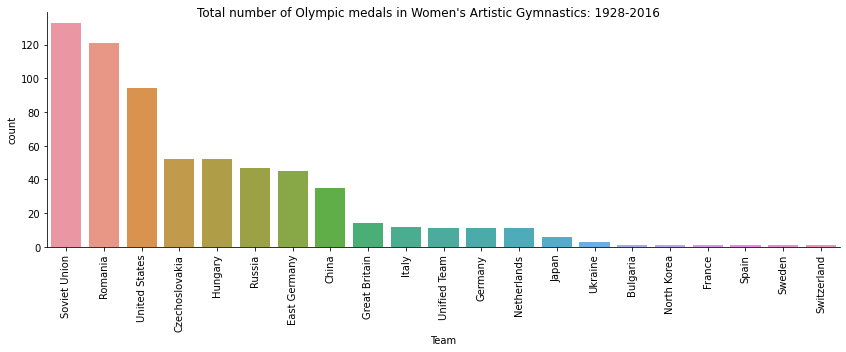

In [23]:
g = sns.catplot(data=womens, kind='count', x='Team', order = womens['Team'].value_counts().index, height=4, aspect=3).set_xticklabels(rotation=90)
g.fig.suptitle("Total number of Olympic medals in Women's Artistic Gymnastics: 1928-2016")
a = womens['Team'].value_counts().to_frame()
a.iloc[0:10]

In [24]:


sns.set_palette('Blues')
beam = womens.loc[womens['Event']=='Balance Beam',]
beam.reset_index(drop=True, inplace=True)



,Team
Soviet Union,15
United States,10
Romania,10
China,5
Czechoslovakia,4
Hungary,2
Russia,2
East Germany,1
Unified Team,1
Ukraine,1


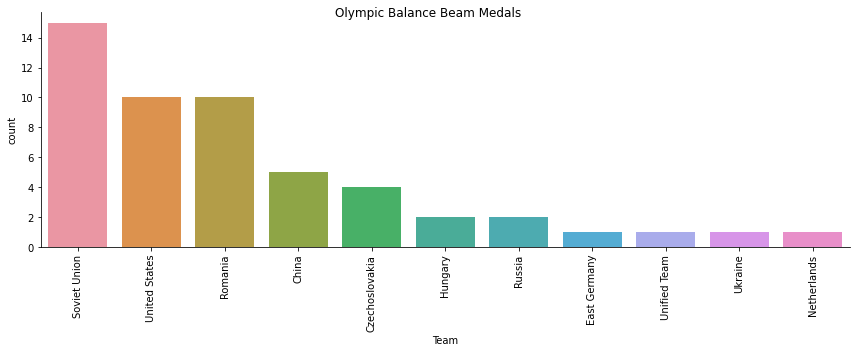

In [25]:
g = sns.catplot(data=beam, kind='count', x='Team', order = beam['Team'].value_counts().index, height=4, aspect=3).set_xticklabels(rotation=90)
g.fig.suptitle("Olympic Balance Beam Medals")
beam['Team'].value_counts().to_frame()

In [26]:
floor = womens.loc[womens['Event']=='Floor',]
floor.reset_index(drop=True, inplace=True)

,Team
Soviet Union,17
Romania,13
United States,9
Hungary,5
Russia,3
Czechoslovakia,1
Bulgaria,1
East Germany,1
Unified Team,1
Spain,1


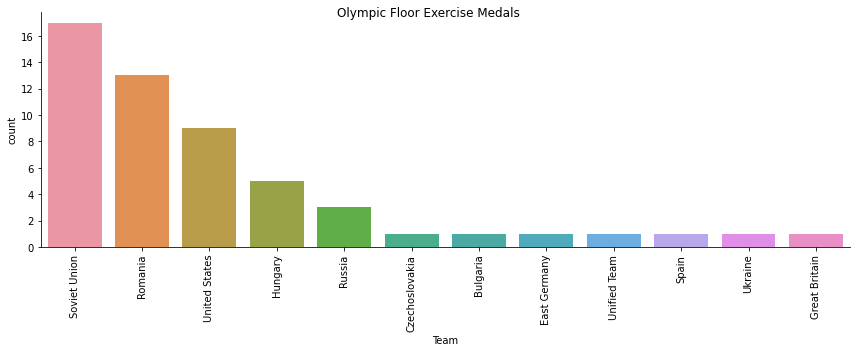

In [27]:
f = sns.catplot(data=floor, kind='count', x='Team', order = floor['Team'].value_counts().index, height=4, aspect=3).set_xticklabels(rotation=90)
f.fig.suptitle("Olympic Floor Exercise Medals")
floor['Team'].value_counts().to_frame()

In [28]:
bars = womens.loc[womens['Event']=='Uneven Bars',]
bars.reset_index(drop=True, inplace=True)

,Team
Soviet Union,12
China,8
United States,8
East Germany,6
Romania,5
Hungary,5
Russia,4
Czechoslovakia,1
Unified Team,1
France,1


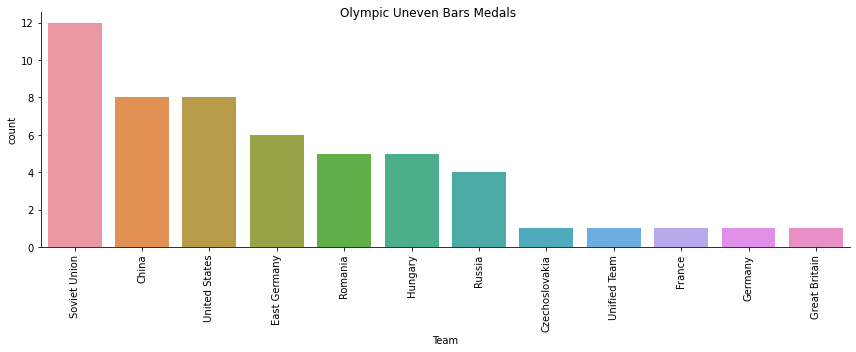

In [29]:
ub = sns.catplot(data=bars, kind='count', x='Team', order = bars['Team'].value_counts().index, height=4, aspect=3).set_xticklabels(rotation=90)
ub.fig.suptitle("Olympic Uneven Bars Medals")
bars['Team'].value_counts().to_frame()

,Team
Soviet Union,15
Romania,11
East Germany,5
Russia,5
United States,4
Czechoslovakia,2
China,2
Germany,2
Hungary,2
North Korea,1


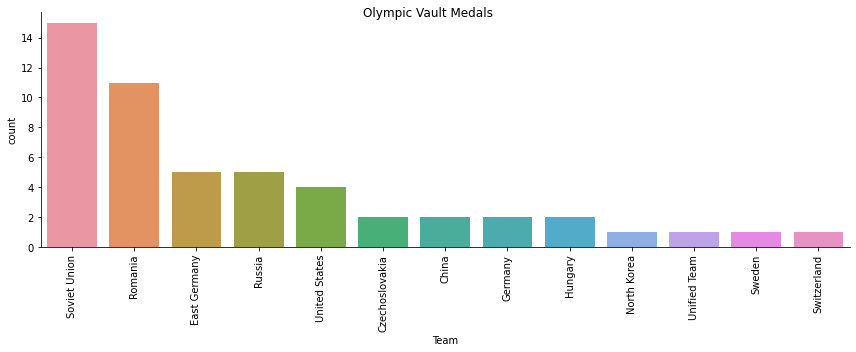

In [30]:
vault = womens.loc[womens['Event']=='Vault',]
vault.reset_index(drop=True, inplace=True)

v = sns.catplot(data=vault, kind='count', x='Team', order = vault['Team'].value_counts().index, height=4, aspect=3).set_xticklabels(rotation=90)
v.fig.suptitle("Olympic Vault Medals")
vault['Team'].value_counts().to_frame()

# USA

In [31]:
sns.set_palette('Reds')
usa = womens.loc[womens['Team']=='United States',]
usa.reset_index(drop=True, inplace=True)

Text(0.5, 0.98, 'Distribution of Medals')

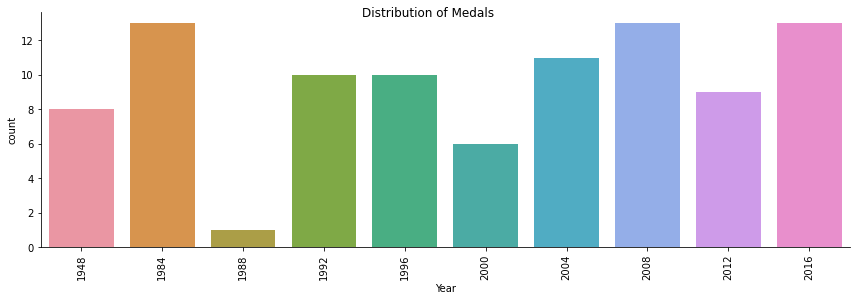

In [32]:
u = sns.catplot(data=usa, kind='count', x='Year', height=4, aspect=3).set_xticklabels(rotation=90)
u.fig.suptitle('Distribution of Medals')

# Team competition

In [33]:
sns.set_palette('Blues')
teams = womens.loc[womens['Event']=='Team',]
teams.reset_index(drop=True, inplace=True)

,Team
Romania,71
Soviet Union,56
United States,55
Czechoslovakia,42
Hungary,36
East Germany,30
Russia,29
China,17
Italy,12
Great Britain,12


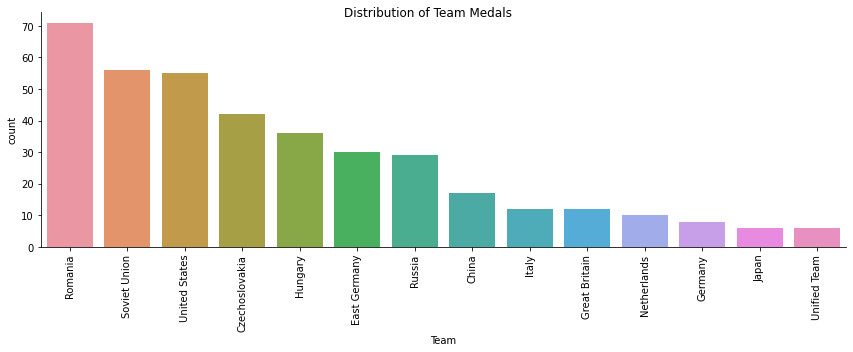

In [34]:
t = sns.catplot(data=teams, kind='count', x='Team', height=4, aspect=3, order=teams['Team'].value_counts().index).set_xticklabels(rotation=90)
t.fig.suptitle('Distribution of Team Medals')
teams['Team'].value_counts().to_frame()

Text(0.5, 0.98, 'WAG Olympic Gymnasts: Age of Gymnast')

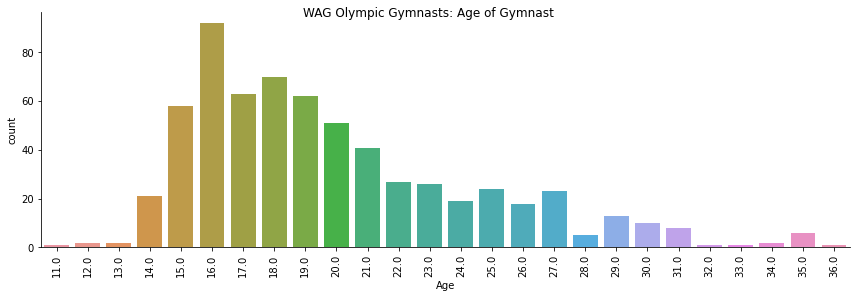

In [35]:
g = sns.catplot(data=womens, kind='count', x='Age', height=4, aspect=3).set_xticklabels(rotation=90)
g.fig.suptitle('WAG Olympic Gymnasts: Age of Gymnast')

In [36]:
womens['Age'].value_counts().to_frame()

,Age
16.0,92
18.0,70
17.0,63
19.0,62
15.0,58
20.0,51
21.0,41
22.0,27
23.0,26
25.0,24


## Post Perfect-10 era

- Long-time gymnastics fans will remember when scoring for WAG was out of 10, and gymnasts strived to score a perfect 10 after Nadia Comaneci became the first to do so at the 1976 Olympics.
- After the 2004 Olympics, the open-ended scoring system began. Competition scores were now a combination of difficulty and execution scores.
- For the past several quads, teams like the USA have been dominating team competitions and All-Around while historically strong teams such as Russia, China, and Romania have become slightly (Russia, China) less prominent (Romania failed to qualify a team to the 2016 Rio Olympic Games).



In [37]:
modern = womens.loc[womens['Year'].isin([2008, 2012, 2016])]

In [38]:
modern['Year'].unique()

array([2008, 2012, 2016])

In [39]:
womens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 677 to 270705
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      653 non-null    int64  
 1   Name    653 non-null    object 
 2   Sex     653 non-null    object 
 3   Age     647 non-null    float64
 4   Height  498 non-null    float64
 5   Weight  495 non-null    float64
 6   Team    653 non-null    object 
 7   NOC     653 non-null    object 
 8   Games   653 non-null    object 
 9   Year    653 non-null    int64  
 10  Season  653 non-null    object 
 11  City    653 non-null    object 
 12  Sport   653 non-null    object 
 13  Event   653 non-null    object 
 14  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 81.6+ KB


,NOC
USA,35
CHN,19
RUS,18
ROU,14
GER,2
GBR,2
PRK,1
SUI,1
NED,1


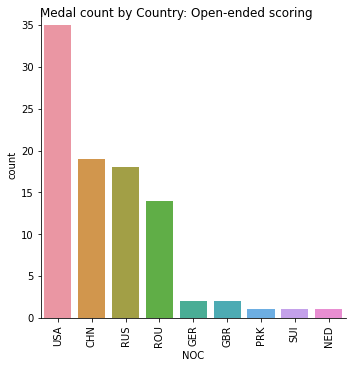

In [40]:
g = sns.catplot(data=modern, kind='count', x='NOC', order = modern['NOC'].value_counts().index).set_xticklabels(rotation=90)
g.fig.suptitle("Medal count by Country: Open-ended scoring")
modern['NOC'].value_counts().to_frame()

,Age
16.0,26
18.0,13
17.0,12
20.0,11
19.0,10
22.0,6
15.0,5
21.0,5
24.0,3
33.0,1


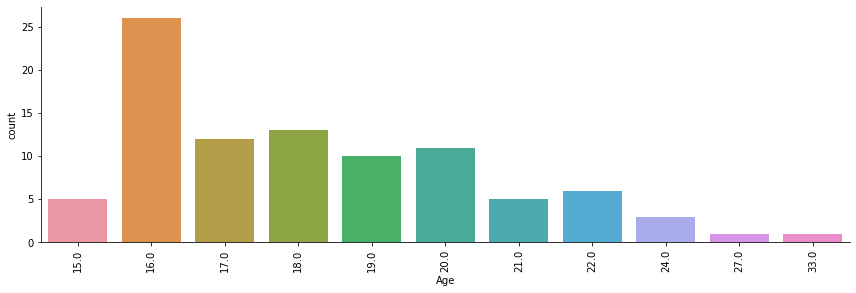

In [41]:
g = sns.catplot(data=modern, kind='count', x='Age', height=4, aspect=3).set_xticklabels(rotation=90)
modern['Age'].value_counts().to_frame()

In [42]:
grouped_modern = modern.groupby('NOC')
grouped_modern['Event'].value_counts().to_frame()

Event
NOC Event              
CHN Team             11
    Balance Beam      3
    Uneven Bars       3
    All-Around        1
    Vault             1
GBR Floor             1
    Uneven Bars       1
GER Uneven Bars       1
    Vault             1
NED Balance Beam      1
PRK Vault             1
ROU Team             11
    Floor             2
    Vault             1
RUS Team             10
    All-Around        3
    Uneven Bars       2
    Vault             2
    Floor             1
SUI Vault             1
USA Team             16
    All-Around        5
    Balance Beam      5
    Floor             5
    Uneven Bars       2
    Vault             2

# My EDA

In [43]:
dfs = raw_data = pd.read_csv('athlete_events.csv')


In [44]:
dfs = raw_data.loc[raw_data['Sport']=='Gymnastics']

In [45]:
#Filter out the women's events: I'm just interested in Women's Artistic Gymnastics
women_events = ['Gymnastics Women\'s Individual All-Around', 'Gymnastics Women\'s Team All-Around', 'Gymnastics Women\'s Horse Vault', 'Gymnastics Women\'s Floor Exercise',
               'Gymnastics Women\'s Uneven Bars', 'Gymnastics Women\'s Balance Beam']
dfs = dfs.loc[df['Event'].isin(women_events)]

In [46]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 676 to 270911
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8947 non-null   int64  
 1   Name    8947 non-null   object 
 2   Sex     8947 non-null   object 
 3   Age     8867 non-null   float64
 4   Height  7586 non-null   float64
 5   Weight  7523 non-null   float64
 6   Team    8947 non-null   object 
 7   NOC     8947 non-null   object 
 8   Games   8947 non-null   object 
 9   Year    8947 non-null   int64  
 10  Season  8947 non-null   object 
 11  City    8947 non-null   object 
 12  Sport   8947 non-null   object 
 13  Event   8947 non-null   object 
 14  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


In [47]:
dfs["Sport"].nunique()

1

In [48]:
dfs["Sex"].nunique()

1

In [49]:
dfs["Event"].nunique()

6

In [50]:
dfs["Medal"].nunique()

3

In [51]:
dfs=dfs.drop(columns=["Sport", "Sex", "Season"])


In [52]:
dfs.head()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Event,Medal
676,394,Irene Abel,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Munich,Gymnastics Women's Individual All-Around,NaN
677,394,Irene Abel,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Munich,Gymnastics Women's Team All-Around,Silver
678,394,Irene Abel,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Munich,Gymnastics Women's Floor Exercise,NaN
679,394,Irene Abel,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Munich,Gymnastics Women's Horse Vault,NaN
680,394,Irene Abel,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Munich,Gymnastics Women's Uneven Bars,NaN


In [53]:
dfs["Event"].nunique()

6

In [54]:
dfs["ID"].nunique()

1499

In [55]:
dfs["Name"].nunique()

1499

In [56]:
df1 = dfs

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 676 to 270911
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8947 non-null   int64  
 1   Name    8947 non-null   object 
 2   Age     8867 non-null   float64
 3   Height  7586 non-null   float64
 4   Weight  7523 non-null   float64
 5   Team    8947 non-null   object 
 6   NOC     8947 non-null   object 
 7   Games   8947 non-null   object 
 8   Year    8947 non-null   int64  
 9   City    8947 non-null   object 
 10  Event   8947 non-null   object 
 11  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 908.7+ KB


In [58]:
df1["Team"].nunique()

79

In [59]:
df1["NOC"].nunique()

79

In [60]:
df1["Games"].nunique()

20

In [61]:
df1["City"].nunique()

19

In [62]:
df1["Event"].nunique()

6

In [63]:
df1["Medal"].nunique()

3

In [64]:
df1.tail()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Event,Medal
270906,135479,Tanja uti (-Kober),25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Helsinki,Gymnastics Women's Team All-Around,NaN
270908,135479,Tanja uti (-Kober),25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Helsinki,Gymnastics Women's Floor Exercise,NaN
270909,135479,Tanja uti (-Kober),25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Helsinki,Gymnastics Women's Horse Vault,NaN
270910,135479,Tanja uti (-Kober),25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Helsinki,Gymnastics Women's Uneven Bars,NaN
270911,135479,Tanja uti (-Kober),25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Helsinki,Gymnastics Women's Balance Beam,NaN


In [65]:
df1 = df1.drop(columns=["NOC"])

In [66]:
df1.describe()

,ID,Age,Height,Weight,Year
count,8947.000000,8867.000000,7586.000000,7523.000000,8947.000000
mean,70139.894266,19.161272,156.117585,47.742789,1980.566894
std,38364.801919,3.957155,6.945167,6.922121,20.439713
min,394.000000,11.000000,127.000000,25.000000,1928.000000
25%,36653.500000,16.000000,152.000000,43.000000,1964.000000
50%,71753.000000,18.000000,157.000000,48.000000,1980.000000
75%,103636.000000,21.000000,161.000000,52.000000,1996.000000
max,135479.000000,41.000000,179.000000,72.000000,2016.000000


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 676 to 270911
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8947 non-null   int64  
 1   Name    8947 non-null   object 
 2   Age     8867 non-null   float64
 3   Height  7586 non-null   float64
 4   Weight  7523 non-null   float64
 5   Team    8947 non-null   object 
 6   Games   8947 non-null   object 
 7   Year    8947 non-null   int64  
 8   City    8947 non-null   object 
 9   Event   8947 non-null   object 
 10  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 838.8+ KB


In [68]:
df1["Games_code"] = df1["Games"].astype("category").cat.codes

In [69]:
df1["Team_code"] = df1["Team"].astype("category").cat.codes

In [70]:
df1["City_code"] = df1["City"].astype("category").cat.codes

In [71]:
df1["Event_code"] = df1["Event"].astype("category").cat.codes

In [72]:
df1.head()

,ID,Name,Age,Height,Weight,Team,Games,Year,City,Event,Medal,Games_code,Team_code,City_code,Event_code
676,394,Irene Abel,19.0,160.0,48.0,East Germany,1972 Summer,1972,Munich,Gymnastics Women's Individual All-Around,NaN,8,21,13,3
677,394,Irene Abel,19.0,160.0,48.0,East Germany,1972 Summer,1972,Munich,Gymnastics Women's Team All-Around,Silver,8,21,13,4
678,394,Irene Abel,19.0,160.0,48.0,East Germany,1972 Summer,1972,Munich,Gymnastics Women's Floor Exercise,NaN,8,21,13,1
679,394,Irene Abel,19.0,160.0,48.0,East Germany,1972 Summer,1972,Munich,Gymnastics Women's Horse Vault,NaN,8,21,13,2
680,394,Irene Abel,19.0,160.0,48.0,East Germany,1972 Summer,1972,Munich,Gymnastics Women's Uneven Bars,NaN,8,21,13,5


In [73]:
df1 = df1.drop(columns=["Team", "City", "Event", "Games"])

In [74]:
df1

,ID,Name,Age,Height,Weight,Year,Medal,Games_code,Team_code,City_code,Event_code
676,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,3
677,394,Irene Abel,19.0,160.0,48.0,1972,Silver,8,21,13,4
678,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,1
679,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,2
680,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,5
...,...,...,...,...,...,...,...,...,...,...,...
270906,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,4
270908,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,1
270909,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,2
270910,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,5


In [75]:

# Count of entries with a medal but no height or weight
count = 0

for index, row in df1.iterrows():
    if row['Medal'] is not np.nan and (pd.isnull(row['Height']) or pd.isnull(row['Weight'])):
        count += 1

print("Number of entries with a medal but no height or weight:", count)


Number of entries with a medal but no height or weight: 158


In [76]:
df1

,ID,Name,Age,Height,Weight,Year,Medal,Games_code,Team_code,City_code,Event_code
676,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,3
677,394,Irene Abel,19.0,160.0,48.0,1972,Silver,8,21,13,4
678,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,1
679,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,2
680,394,Irene Abel,19.0,160.0,48.0,1972,NaN,8,21,13,5
...,...,...,...,...,...,...,...,...,...,...,...
270906,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,4
270908,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,1
270909,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,2
270910,135479,Tanja uti (-Kober),25.0,NaN,NaN,1952,NaN,3,78,6,5


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 676 to 270911
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8947 non-null   int64  
 1   Name        8947 non-null   object 
 2   Age         8867 non-null   float64
 3   Height      7586 non-null   float64
 4   Weight      7523 non-null   float64
 5   Year        8947 non-null   int64  
 6   Medal       653 non-null    object 
 7   Games_code  8947 non-null   int8   
 8   Team_code   8947 non-null   int8   
 9   City_code   8947 non-null   int8   
 10  Event_code  8947 non-null   int8   
dtypes: float64(3), int64(2), int8(4), object(2)
memory usage: 594.1+ KB


In [78]:
df1["Medal"]

676          NaN
677       Silver
678          NaN
679          NaN
680          NaN
           ...  
270906       NaN
270908       NaN
270909       NaN
270910       NaN
270911       NaN
Name: Medal, Length: 8947, dtype: object

In [79]:
df1["Medal_code"] = df1["Medal"].astype("category").cat.codes

In [80]:
df1=df1.drop(columns=["Medal"])

In [81]:
df1.fillna(0, inplace=True)


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 676 to 270911
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8947 non-null   int64  
 1   Name        8947 non-null   object 
 2   Age         8947 non-null   float64
 3   Height      8947 non-null   float64
 4   Weight      8947 non-null   float64
 5   Year        8947 non-null   int64  
 6   Games_code  8947 non-null   int8   
 7   Team_code   8947 non-null   int8   
 8   City_code   8947 non-null   int8   
 9   Event_code  8947 non-null   int8   
 10  Medal_code  8947 non-null   int8   
dtypes: float64(3), int64(2), int8(5), object(1)
memory usage: 533.0+ KB


In [83]:
df3 = df1.drop(columns=["Name"])
named = df1.drop(columns=["Name"])

In [88]:
df3["Medal_code"]

676      -1
677       2
678      -1
679      -1
680      -1
         ..
270906   -1
270908   -1
270909   -1
270910   -1
270911   -1
Name: Medal_code, Length: 8947, dtype: int8

In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 676 to 270911
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8947 non-null   int64  
 1   Age         8947 non-null   float64
 2   Height      8947 non-null   float64
 3   Weight      8947 non-null   float64
 4   Year        8947 non-null   int64  
 5   Games_code  8947 non-null   int8   
 6   Team_code   8947 non-null   int8   
 7   City_code   8947 non-null   int8   
 8   Event_code  8947 non-null   int8   
 9   Medal_code  8947 non-null   int8   
dtypes: float64(3), int64(2), int8(5)
memory usage: 463.1 KB


In [89]:
df3["Medal_code"].nunique()

4

In [91]:
# df3.to_csv('big_nums.csv', index=False)

In [95]:
df3[df3["Medal_code"]==-1].sum()

ID            581980908.0
Age              157035.0
Height          1107159.0
Weight           336348.0
Year           16428856.0
Games_code        84770.0
Team_code        315585.0
City_code         80447.0
Event_code        20263.0
Medal_code        -8294.0
dtype: float64

In [96]:
df3[df3["Medal_code"]==1].sum()

ID            14667542.0
Age               4432.0
Height           25948.0
Weight            7702.0
Year            435096.0
Games_code        2120.0
Team_code        12043.0
City_code         1965.0
Event_code         713.0
Medal_code         220.0
dtype: float64

In [97]:
newdf = df3.drop(columns=["Medal_code"])

In [98]:
# newdf.to_csv('small_nums.csv', index=False)

In [ ]:
df1

In [ ]:
# Setting random_state for reproducibility
df_randomized = df3.sample(frac=1, random_state=42) 
df2 = df_randomized

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# Assuming df is your DataFrame
X = df2.drop('Medal_code', axis=1)  # Features
y = df2['Medal_code']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]
print(incorrect_predictions)

In [ ]:
results_df["Predicted"].nunique()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a Random Forest classifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a DataFrame to show incorrect predictions
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]
print("Incorrect Predictions:")
print(incorrect_predictions)
print(f'number of unique predictions: {results_df["Predicted"].nunique()} ')

In [ ]:
df1

In [ ]:
results_df

In [ ]:
combined_df = pd.concat([df1, results_df], axis=1)

In [ ]:
combined_df = combined_df.dropna()

In [ ]:
combined_df

In [ ]:
filtered_df = combined_df.loc[combined_df["Medal_code"] != -1]
filtered_df

In [ ]:
filtered_df["ID"].nunique()